Impoting Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re

In [3]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [4]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

In [6]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,classification_report

In [7]:
pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
from scikitplot.metrics import plot_confusion_matrix

In [9]:
from pylab import rcParams

Importing Training dataset

In [10]:
df = pd.read_csv('/content/Musical_instruments_reviews_111.csv')

In [14]:
df

,reviewerID,overall,summary
0,A2IBPI20UZIR0U,5,good
1,A14VAT5EAX3D9S,5,Jake
2,A195EZSQDW3E21,5,It Does The Job Well
3,A2C00NNG1ZQQG2,5,GOOD WINDSCREEN FOR THE MONEY
4,A94QU4C90B1AX,5,No more pops when I record my vocals.
...,...,...,...
995,AKYDGCKCY7H9F,5,Another use
996,A23AKO4BZLZ8DE,3,meh.
997,A2MIP3AQVSF2SS,5,The best fretboard treatment I have ever used
998,A2C46HQIZLYJUC,3,"Good product idea, could causes problems for s..."


<Axes: xlabel='overall', ylabel='count'>

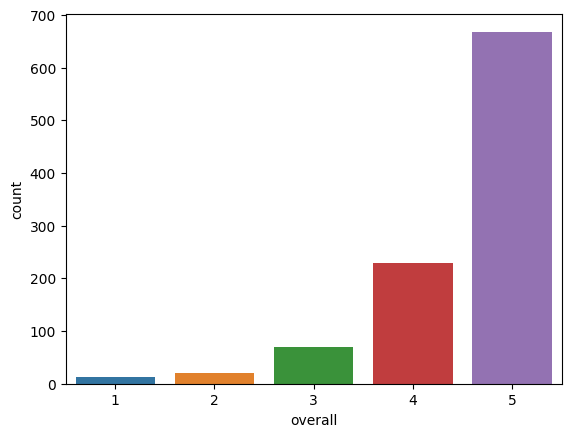

In [11]:
sns.countplot(x='overall',data=df)

Data pre-processing

In [12]:
lm = WordNetLemmatizer()

def text_transformation(df_col):
    corpus = []
    for item in df_col:
        new_item = re.sub('[^a-zA-Z]',' ',str(item))
        new_item = new_item.lower()
        new_item = new_item.split()
        new_item = [lm.lemmatize(word) for word in new_item if word not in set(stopwords.words('english'))]
        corpus.append(' '.join(str(x) for x in new_item))
    return corpus

In [13]:
corpus = text_transformation(df['summary'])

Text Data Visualisation

In [15]:
rcParams['figure.figsize'] = 20,8
word_cloud = ""
for row in corpus:
    for word in row:
        word_cloud+=" ".join(word)
wordcloud = WordCloud(width = 1000, height = 500,background_color ='white',min_font_size = 10).generate(word_cloud)


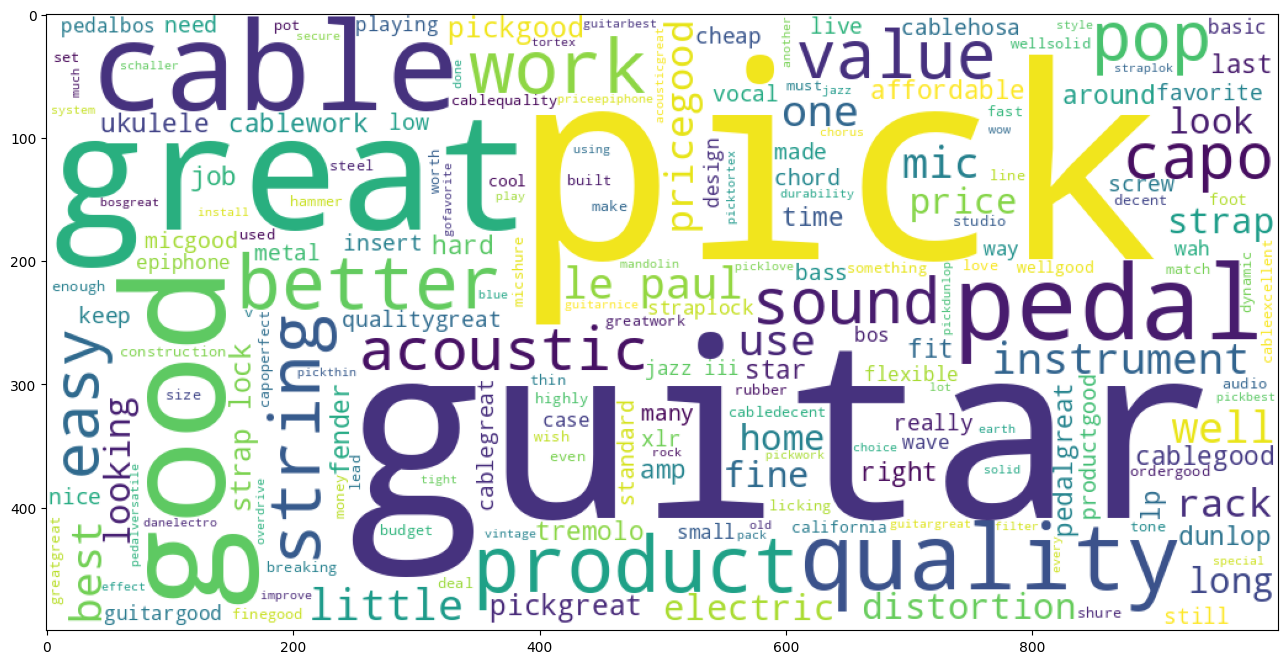

In [16]:
plt.imshow(wordcloud)

Converting the text data into vectors

In [18]:
cv = CountVectorizer(ngram_range=(1,2))
traindata = cv.fit_transform(corpus)
X = traindata
y = df.overall

Building machine learning model

In [19]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [20]:
lr.fit(X,y)

LogisticRegression()

Test Data Transformation

In [21]:
test_df = pd.read_csv('/content/Musical_instruments_reviews_111_test.csv')

In [24]:
X_test,y_test = test_df.summary,test_df.overall

In [25]:
test_corpus = text_transformation(X_test)

In [26]:
testdata = cv.transform(test_corpus)

Fitting test data for Prediction

In [27]:
predictions = lr.predict(testdata)

Confusion Matrix

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

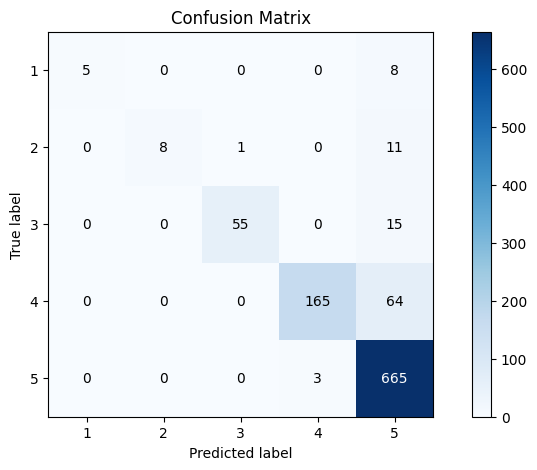

In [28]:
rcParams['figure.figsize'] = 10,5
plot_confusion_matrix(y_test,predictions)

Classification Report

In [31]:
acc_score = accuracy_score(y_test,predictions)
print('Accuracy_score: ',acc_score)

Accuracy_score:  0.898


In [32]:
cr = classification_report(y_test,predictions)
print(cr)

              precision    recall  f1-score   support

           1       1.00      0.38      0.56        13
           2       1.00      0.40      0.57        20
           3       0.98      0.79      0.87        70
           4       0.98      0.72      0.83       229
           5       0.87      1.00      0.93       668

    accuracy                           0.90      1000
   macro avg       0.97      0.66      0.75      1000
weighted avg       0.91      0.90      0.89      1000

